In [2]:
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
gene_dep = pd.read_csv('data/achilles_gene_dependency.csv',index_col=0)

In [5]:
gene_dep.shape

(625, 18333)

In [6]:
gene_dep.head(10)

,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ACH-000004,0.001451,0.004520,0.102872,0.018067,0.008767,0.085647,0.000065,0.431382,0.000192,0.001974,...,0.060016,0.465022,NaN,NaN,0.000372,0.000517,0.374798,0.000220,0.000541,0.059707
ACH-000005,0.026104,0.001092,0.001859,0.002384,0.073250,0.175472,0.000745,0.528323,0.029178,0.011600,...,0.064166,0.252776,0.067042,0.037138,0.001671,0.027810,0.033134,0.010160,0.013513,0.103597
ACH-000007,0.004364,0.003030,0.017460,0.001112,0.002801,0.001155,0.003964,0.432981,0.009979,0.000158,...,0.027625,0.137708,0.012447,0.001760,0.000440,0.010849,0.219132,0.002946,0.296057,0.383729
ACH-000009,0.002986,0.008234,0.014550,0.002942,0.004015,0.003802,0.005994,0.671296,0.000620,0.004395,...,0.240007,0.154809,0.010861,0.001271,0.001252,0.004284,0.592691,0.000227,0.030041,0.552916
ACH-000011,0.000254,0.003716,0.009770,0.000015,0.016456,0.131691,0.002650,0.350667,0.001843,0.002332,...,0.331856,0.493477,0.042943,0.042179,0.000285,0.001603,0.101851,0.002336,0.123363,0.306065
ACH-000012,0.006585,0.000650,0.002101,0.000076,0.005949,0.039098,0.000148,0.496048,0.002616,0.000075,...,0.316770,0.903348,0.003081,0.013213,0.001073,0.001261,0.037322,0.003660,0.058364,0.332458
ACH-000013,0.004887,0.006845,0.020258,0.000569,0.027806,0.028374,0.005170,0.505162,0.007531,0.000194,...,0.010434,0.001892,0.024174,0.019491,0.000312,0.017229,0.079498,0.001365,0.107523,0.619927
ACH-000014,0.001156,0.012898,0.007196,0.000637,0.012610,0.027250,0.044594,0.451602,0.019987,0.000854,...,0.069487,0.932838,NaN,NaN,0.018422,0.006032,0.067962,0.017100,0.000352,0.204259
ACH-000015,0.026106,0.007272,0.072215,0.001568,0.012737,0.036572,0.000224,0.290348,0.000692,0.000250,...,0.030156,0.115563,0.015421,0.009875,0.000063,0.000555,0.151136,0.000561,0.160490,0.089013
ACH-000017,0.000980,0.002869,0.028000,0.002748,0.100577,0.054300,0.000285,0.322310,0.010416,0.001041,...,0.083403,0.715688,0.020735,0.000497,0.003282,0.003351,0.127736,0.000280,0.209408,0.148503


In [7]:
keep_columns = []

In [8]:
for c in gene_dep.columns:
    if((gene_dep[c] > 0.5).any()):
        keep_columns.append(c)

In [9]:
gene_dep_important = gene_dep.loc[:, keep_columns]

In [10]:
gene_dep_important.shape

(625, 10562)

In [11]:
ranks = pd.DataFrame(index=gene_dep_important.columns, columns=list(gene_dep_important.index))

In [12]:
i=1
r=list(gene_dep_important.index)
l=len(r)
for cell_line in r:
    print('analyzing cell line', cell_line, i,"of",l)
    ranks[cell_line]=gene_dep_important.loc[cell_line].rank()
    i+=1

analyzing cell line ACH-000004 1 of 625
analyzing cell line ACH-000005 2 of 625
analyzing cell line ACH-000007 3 of 625
analyzing cell line ACH-000009 4 of 625
analyzing cell line ACH-000011 5 of 625
analyzing cell line ACH-000012 6 of 625
analyzing cell line ACH-000013 7 of 625
analyzing cell line ACH-000014 8 of 625
analyzing cell line ACH-000015 9 of 625
analyzing cell line ACH-000017 10 of 625
analyzing cell line ACH-000018 11 of 625
analyzing cell line ACH-000019 12 of 625
analyzing cell line ACH-000021 13 of 625
analyzing cell line ACH-000022 14 of 625
analyzing cell line ACH-000025 15 of 625
analyzing cell line ACH-000028 16 of 625
analyzing cell line ACH-000029 17 of 625
analyzing cell line ACH-000030 18 of 625
analyzing cell line ACH-000035 19 of 625
analyzing cell line ACH-000036 20 of 625
analyzing cell line ACH-000037 21 of 625
analyzing cell line ACH-000039 22 of 625
analyzing cell line ACH-000040 23 of 625
analyzing cell line ACH-000041 24 of 625
analyzing cell line ACH-0

analyzing cell line ACH-000411 199 of 625
analyzing cell line ACH-000414 200 of 625
analyzing cell line ACH-000415 201 of 625
analyzing cell line ACH-000416 202 of 625
analyzing cell line ACH-000420 203 of 625
analyzing cell line ACH-000421 204 of 625
analyzing cell line ACH-000422 205 of 625
analyzing cell line ACH-000424 206 of 625
analyzing cell line ACH-000425 207 of 625
analyzing cell line ACH-000426 208 of 625
analyzing cell line ACH-000427 209 of 625
analyzing cell line ACH-000433 210 of 625
analyzing cell line ACH-000434 211 of 625
analyzing cell line ACH-000436 212 of 625
analyzing cell line ACH-000437 213 of 625
analyzing cell line ACH-000444 214 of 625
analyzing cell line ACH-000445 215 of 625
analyzing cell line ACH-000448 216 of 625
analyzing cell line ACH-000450 217 of 625
analyzing cell line ACH-000452 218 of 625
analyzing cell line ACH-000454 219 of 625
analyzing cell line ACH-000458 220 of 625
analyzing cell line ACH-000459 221 of 625
analyzing cell line ACH-000460 222

analyzing cell line ACH-000796 402 of 625
analyzing cell line ACH-000799 403 of 625
analyzing cell line ACH-000800 404 of 625
analyzing cell line ACH-000801 405 of 625
analyzing cell line ACH-000802 406 of 625
analyzing cell line ACH-000804 407 of 625
analyzing cell line ACH-000805 408 of 625
analyzing cell line ACH-000809 409 of 625
analyzing cell line ACH-000810 410 of 625
analyzing cell line ACH-000811 411 of 625
analyzing cell line ACH-000817 412 of 625
analyzing cell line ACH-000819 413 of 625
analyzing cell line ACH-000820 414 of 625
analyzing cell line ACH-000821 415 of 625
analyzing cell line ACH-000822 416 of 625
analyzing cell line ACH-000823 417 of 625
analyzing cell line ACH-000824 418 of 625
analyzing cell line ACH-000827 419 of 625
analyzing cell line ACH-000829 420 of 625
analyzing cell line ACH-000831 421 of 625
analyzing cell line ACH-000832 422 of 625
analyzing cell line ACH-000833 423 of 625
analyzing cell line ACH-000834 424 of 625
analyzing cell line ACH-000835 425

analyzing cell line ACH-001523 598 of 625
analyzing cell line ACH-001524 599 of 625
analyzing cell line ACH-001529 600 of 625
analyzing cell line ACH-001532 601 of 625
analyzing cell line ACH-001536 602 of 625
analyzing cell line ACH-001550 603 of 625
analyzing cell line ACH-001552 604 of 625
analyzing cell line ACH-001554 605 of 625
analyzing cell line ACH-001555 606 of 625
analyzing cell line ACH-001563 607 of 625
analyzing cell line ACH-001566 608 of 625
analyzing cell line ACH-001568 609 of 625
analyzing cell line ACH-001645 610 of 625
analyzing cell line ACH-001647 611 of 625
analyzing cell line ACH-001650 612 of 625
analyzing cell line ACH-001654 613 of 625
analyzing cell line ACH-001715 614 of 625
analyzing cell line ACH-001735 615 of 625
analyzing cell line ACH-001736 616 of 625
analyzing cell line ACH-001737 617 of 625
analyzing cell line ACH-001740 618 of 625
analyzing cell line ACH-001745 619 of 625
analyzing cell line ACH-001750 620 of 625
analyzing cell line ACH-001765 621

In [13]:
ranks.to_csv('data/gene_dependency_ranks_above_0-5.csv')

In [14]:
ranks.to_pickle('data/gene_dependency_ranks_above_0-5.pkl')

Visualizing Rank Distributions of 100 random genes from gene_dependency data


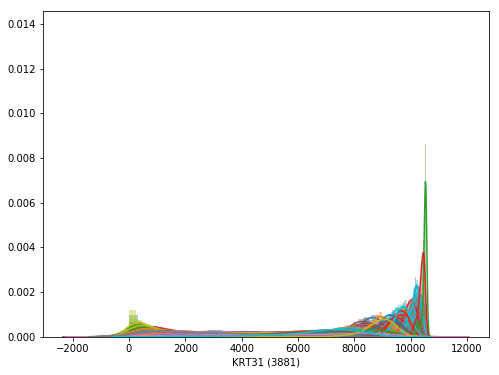

In [15]:
print('Visualizing Rank Distributions of 100 random genes from gene_dependency data')
for g in random.sample(list(ranks.index), 100):
    plt.rcParams["figure.figsize"] = (8,6)
    sns.distplot(ranks.loc[g].fillna(0))

In [16]:
from statistics import variance,mean,median
import numpy as np

In [17]:
stats = pd.DataFrame(index=ranks.index,columns=['std','mean','median'])

In [18]:
stats['std']=[ranks.loc[g].std() for g in stats.index]

In [19]:
stats['mean']=[np.nanmean(ranks.loc[g]) for g in stats.index]

In [20]:
stats['median']=[median(ranks.loc[g]) for g in stats.index]

In [21]:
stats['max']=[max(ranks.loc[g]) for g in stats.index]

In [22]:
stats['min']=[min(ranks.loc[g]) for g in stats.index]

In [23]:
stats.to_pickle('data/gene_dependency_ranks_above_0-5_stats.pkl')
stats.to_csv('data/gene_dependency_ranks_above_0-5_stats.csv')

In [24]:
stats.head()

,std,mean,median,max,min
A1CF (29974),1303.068077,1399.7536,999.0,8844.0,2.0
A3GALT2 (127550),1854.356642,3009.9952,2738.0,8942.0,37.0
A4GALT (53947),1679.197747,2826.9536,2560.0,8790.0,37.0
AAAS (8086),951.171134,8199.5104,8391.0,10241.0,1593.0
AACS (65985),1417.014528,1377.0192,906.0,9128.0,17.0


In [25]:
highest_std_genes = stats.head(10).sort_values(by='std', ascending=False)[:10]
highest_std_genes

,std,mean,median,max,min
AAR2 (25980),1936.421675,2909.4400,2599.0,9114.0,8.0
A3GALT2 (127550),1854.356642,3009.9952,2738.0,8942.0,37.0
AAMDC (28971),1754.457184,2768.2096,2384.0,8617.0,39.0
AANAT (15),1693.109206,5112.0480,5314.0,9008.0,375.0
A4GALT (53947),1679.197747,2826.9536,2560.0,8790.0,37.0
AAK1 (22848),1417.415331,6689.0592,7005.0,9160.0,1440.0
AACS (65985),1417.014528,1377.0192,906.0,9128.0,17.0
A1CF (29974),1303.068077,1399.7536,999.0,8844.0,2.0
AAAS (8086),951.171134,8199.5104,8391.0,10241.0,1593.0
AAMP (14),625.207734,9144.9216,9238.0,10343.0,273.0


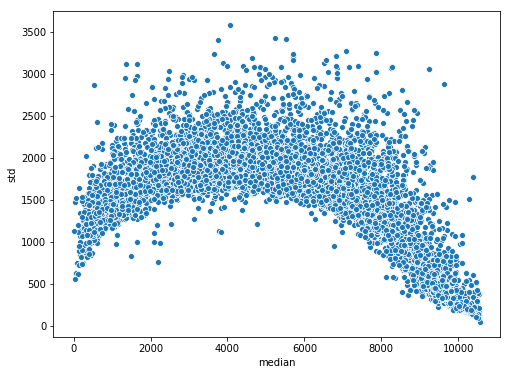

In [26]:
sns.scatterplot(x=stats['median'],y=stats['std'])

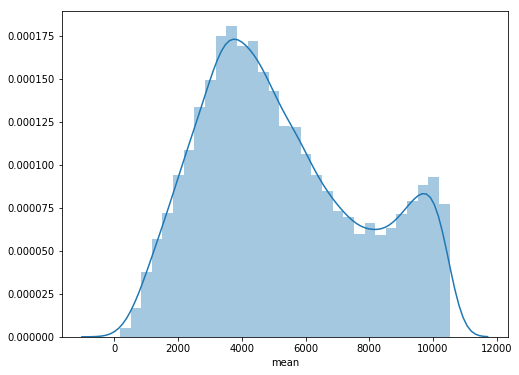

In [27]:
sns.distplot(stats['mean'].fillna(0))

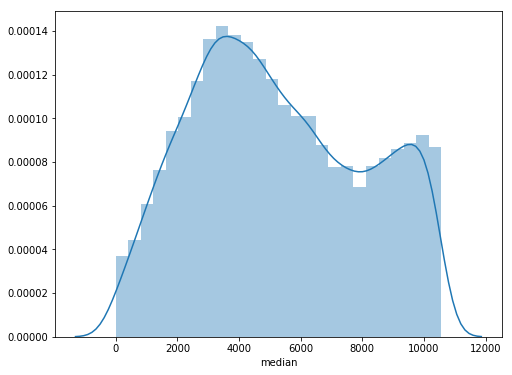

In [28]:
sns.distplot(stats['median'].fillna(0))

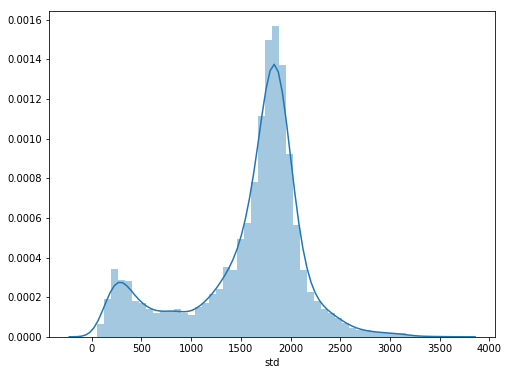

In [29]:
sns.distplot(stats['std'].fillna(0))

In [30]:
correlation_matrix = ranks[ranks.columns].corr()
correlation_matrix.head(5)

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.670811,0.634086,0.668743,0.627837,0.683202,0.674804,0.645831,0.678091,0.644843,...,0.674436,0.515364,0.682904,0.679575,0.653029,0.684327,0.600411,0.645787,0.694980,0.647552
ACH-000005,0.670811,1.000000,0.595817,0.612021,0.618527,0.637441,0.647392,0.605953,0.637074,0.631191,...,0.645563,0.508010,0.619845,0.642149,0.633958,0.655382,0.576940,0.615256,0.655533,0.635836
ACH-000007,0.634086,0.595817,1.000000,0.689916,0.659210,0.689017,0.686473,0.656473,0.689560,0.664908,...,0.662469,0.506101,0.665620,0.682570,0.668785,0.687120,0.623574,0.662435,0.697441,0.678311
ACH-000009,0.668743,0.612021,0.689916,1.000000,0.674617,0.745205,0.724943,0.690675,0.731248,0.682845,...,0.678239,0.542141,0.690460,0.706106,0.697572,0.726958,0.637741,0.685768,0.739834,0.726810
ACH-000011,0.627837,0.618527,0.659210,0.674617,1.000000,0.689373,0.700604,0.676628,0.684779,0.670969,...,0.672168,0.552894,0.666295,0.684159,0.700965,0.712906,0.643263,0.688556,0.730965,0.731748


/usr/local/lib/python3.5/site-packages/seaborn/matrix.py:626: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


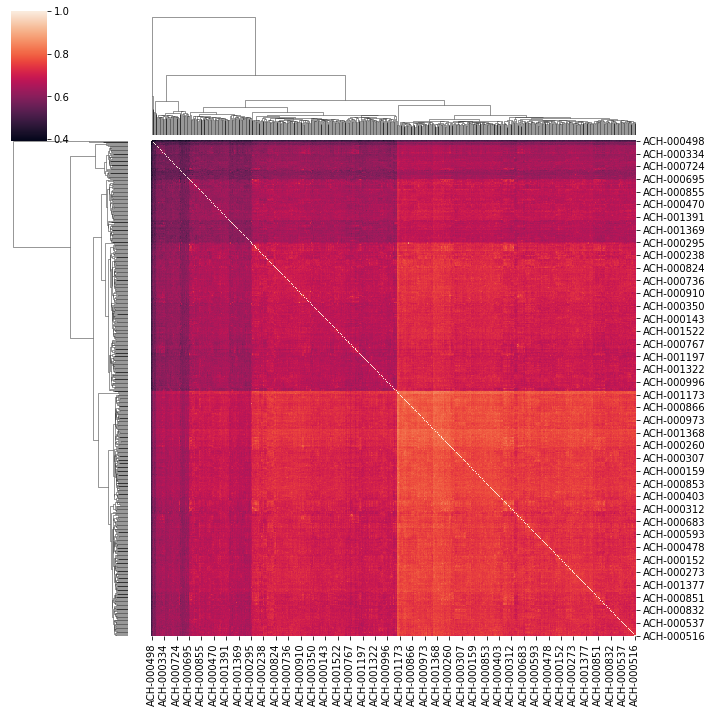

In [31]:
sns.clustermap(correlation_matrix)

In [32]:
correlation_matrix.to_pickle("data/cell_correlation_above_0-5.pkl")

In [33]:
correlation_matrix.to_csv('data/cell_correlation_above_0-5.csv')